In [1]:
pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [47]:
data = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')

In [48]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

In [49]:
# Display basic statistics
print(data.describe())

# Display information about the dataset
print(data.info())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [55]:
# Replace infinite values with NaN
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

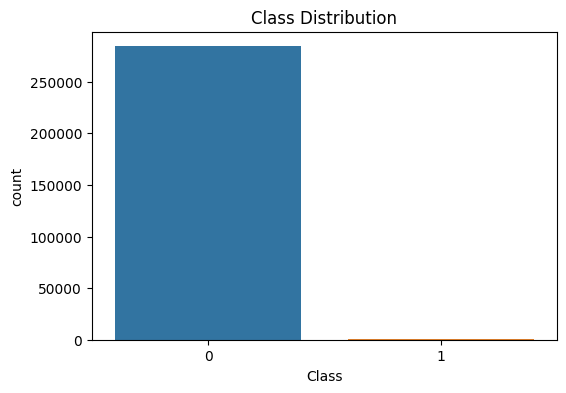

In [51]:
# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [4]:
data.shape

(284807, 31)

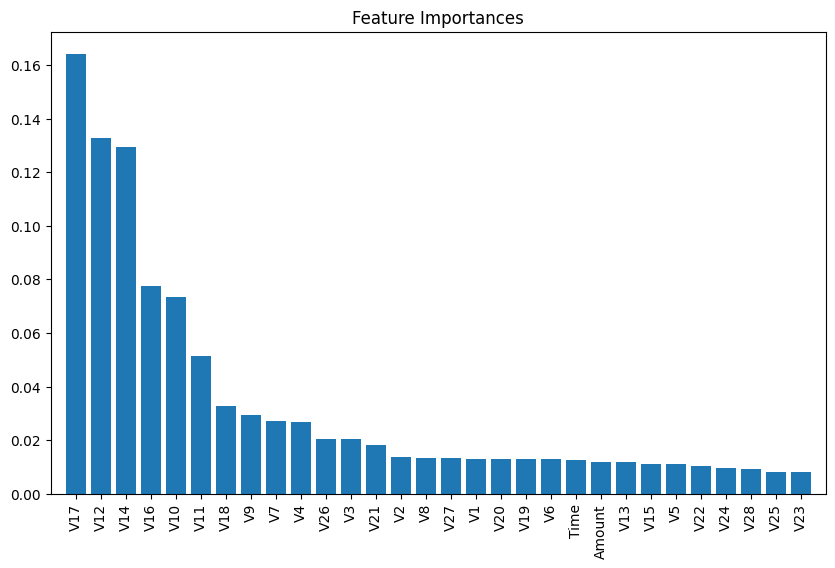

In [56]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming 'Class' is the target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Assuming 'Time' is a feature in the dataset
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Amount', hue='Class', data=data)
plt.title('Transaction Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Class', palette='viridis', data=tsne_df)
plt.title('t-SNE Visualization of PCA-Transformed Data')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Class')
plt.show()

In [5]:
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]
print(fraud_data.shape)
print(non_fraud_data.shape)

(492, 31)
(284315, 31)


In [6]:
# Separate features and target
features = data.columns.drop('Class')
fraud_features = fraud_data[features]
fraud_target = fraud_data['Class']

In [7]:
# Split the fraud data into training and testing sets
fraud_train, fraud_test = train_test_split(fraud_data, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the CTGAN model
ctgan = CTGAN()
ctgan.fit(fraud_train, discrete_columns=['Class'])

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:769: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [9]:
# Generate synthetic fraud data
num_samples = int(0.1 * len(data)) 
synthetic_fraud_data = ctgan.sample(num_samples)

In [10]:
# Combine synthetic fraud data with original fraud data
combined_fraud_data = pd.concat([fraud_data, synthetic_fraud_data], ignore_index=True)

In [11]:
# Combine the combined fraud data with non-fraud data
balanced_data = pd.concat([non_fraud_data, combined_fraud_data], ignore_index=True)

# Print the shape of the balanced dataset
print(balanced_data.shape)

(313287, 31)


In [12]:
 #Separate features and target for the balanced data
X_balanced = balanced_data[features]
y_balanced = balanced_data['Class']

In [13]:
# Split the balanced data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

In [15]:
# Train a classifier on the balanced data
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = clf_balanced.predict(X_test_balanced)
print("Classification report for the balanced data:")
print(classification_report(y_test_balanced, y_pred_balanced))

Classification report for the balanced data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00      5794

    accuracy                           1.00     62658
   macro avg       1.00      1.00      1.00     62658
weighted avg       1.00      1.00      1.00     62658



In [16]:
# Evaluate the model on the separate fraud test set
X_fraud_test = fraud_test[features]
y_fraud_test = fraud_test['Class']
y_pred_fraud_test = clf_balanced.predict(X_fraud_test)
print("Classification report for the fraud test data:")
print(classification_report(y_fraud_test, y_pred_fraud_test))

Classification report for the fraud test data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98        99

    accuracy                           0.97        99
   macro avg       0.50      0.48      0.49        99
weighted avg       1.00      0.97      0.98        99



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(p=0.5)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(16, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(32, input_dim),
            nn.Sigmoid()
        )
        self._initialize_weights()

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

In [36]:
# # Convert data to NumPy arrays
# X_train_balanced_np = X_train_balanced_scaled.to_numpy()
# X_test_balanced_np = X_test_balanced_scaled.to_numpy()

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_balanced_scaled, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [42]:
# Initialize the model, loss function, and optimizer
input_dim = X_train_balanced.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
from torch.optim.lr_scheduler import LambdaLR

def lr_lambda(epoch):
    return min(1.0, epoch / 10)

scheduler = LambdaLR(optimizer, lr_lambda)

In [43]:
import torch

num_epochs = 10
best_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        inputs, _ = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients
        loss.backward()
        optimizer.step()
        scheduler.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Check if the current loss is the best loss
    if loss.item() < best_loss:
        best_loss = loss.item()
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        print("Early stopping")
        break

# Load the best model
model.load_state_dict(torch.load('best_model.pt', weights_only=True))

Epoch [1/10], Loss: 1.9873
Epoch [2/10], Loss: 0.3261
Epoch [3/10], Loss: 1.4400
Early stopping


<All keys matched successfully>